## Calculating returns

### What you will learn in this session

- Calculating returns for stock price data
- Calculating monthl and annual returns using grouped aggregation
- Creating new columns for monthly and annual returns

### Examples from the intro

#### Calculating returns and total return

In [4]:
import yfinance as yf
aapl = yf.download('AAPL', period='5y')

[*********************100%***********************]  1 of 1 completed


In [6]:
aapl['ret'] = aapl['Adj Close'].pct_change()

aapl.head()

,Open,High,Low,Close,Adj Close,Volume,ret
Date,,,,,,,
2016-05-11,23.370001,23.392500,23.115000,23.127501,21.605364,114876400,NaN
2016-05-12,23.180000,23.195000,22.367500,22.584999,21.098566,305258800,-0.023457
2016-05-13,22.500000,22.917500,22.500000,22.629999,21.140608,177571200,0.001993
2016-05-16,23.097500,23.597500,22.912500,23.469999,21.925322,245039200,0.037119
2016-05-17,23.637501,23.674999,23.252501,23.372499,21.834238,187667600,-0.004154


In [2]:
aapl = yf.download('AAPL', period='5y')

aapl['Adj Close'].pct_change()


[*********************100%***********************]  1 of 1 completed


Date
2016-05-11         NaN
2016-05-12   -0.023457
2016-05-13    0.001993
2016-05-16    0.037119
2016-05-17   -0.004154
                ...   
2021-05-05    0.001956
2021-05-06    0.012802
2021-05-07    0.005327
2021-05-10   -0.025805
2021-05-11   -0.022310
Name: Adj Close, Length: 1259, dtype: float64

In [32]:
# calculating return rate
aapl['ret'] = aapl['Adj Close'].pct_change()

In [33]:
# calculating total return for the first 5 days method 1
aapl_ret_1  = aapl['ret'] + 1
aapl_ret_1[:5].prod() - 1

-0.00379624076069518

In [34]:
# calculating total return for the first 5 days method 2
aapl['ret_1'] = aapl['ret'] + 1
aapl['ret_1'][:5].prod() - 1

-0.00379624076069518

In [35]:
# calculating total return for the first 5 days method 3
(aapl['ret'][:5] + 1).prod() - 1

-0.00379624076069518

#### Calculating new column with annual returns

In [36]:
# extracting the year from the index
aapl['year'] = aapl.index.year

# new column for return + 1, for calculating the product
aapl['ret_1'] = aapl['ret'] + 1

# calculate new column for annual returns
aapl['ann_ret'] = aapl.groupby('year')['ret_1'].transform('prod') - 1

aapl

,Open,High,Low,Close,Adj Close,Volume,year,ret,ret_1,ann_ret
Date,,,,,,,,,,
2016-05-02,23.492500,23.520000,23.100000,23.410000,21.773848,192640400,2016,NaN,NaN,0.257560
2016-05-03,23.549999,23.934999,23.420000,23.795000,22.131937,227325200,2016,0.016446,1.016446,0.257560
2016-05-04,23.799999,23.975000,23.455000,23.547501,21.901741,164102000,2016,-0.010401,0.989599,0.257560
2016-05-05,23.500000,23.517500,23.170000,23.309999,21.812840,143562000,2016,-0.004059,0.995941,0.257560
2016-05-06,23.342501,23.362499,22.962500,23.180000,21.691189,174799600,2016,-0.005577,0.994423,0.257560
...,...,...,...,...,...,...,...,...,...,...
2021-04-23,132.160004,135.119995,132.160004,134.320007,134.320007,78657500,2021,0.018039,1.018039,0.007457
2021-04-26,134.830002,135.059998,133.559998,134.720001,134.720001,66905100,2021,0.002978,1.002978,0.007457
2021-04-27,135.009995,135.410004,134.110001,134.389999,134.389999,66015800,2021,-0.002450,0.997550,0.007457


### Task 1 - Importing the netflix stock data

1. Import the yfinance library under the alias yf.
2. Download the Netflix stock data starting from 2009.
3. print the head and tail of the netflix data.

In [ ]:
# Import the yfinance library under the alias yf.


# Download the Netflix stock data starting from 2009.


# print the head and tail of the netflix data.



### Task 2 - Calculate the total return

1. Create a new column for the return rates called 'ret'
2. Calculate the total return rate for the first 10 days

In [25]:
# Create a new column for the return rates called 'ret'


# Calculate the total return rate for the first 10 days



0.058587212408481415

### Task 3 - Calculating the annual returns for netflix

1. Create a new column for the year, by extracting the year value from the index
2. Calculate a column for the return + 1
3. Calculate a new column for the annual returns. Group based on the year column and broadcast the product of the ret + 1 column using the `.transform()` method.


In [1]:
# Create a new column for the year, by extracting the year value from the index


# Calculate a column for the return + 1


# Calculate a new column for the annual returns. 
# Create groups based on the year column and broadcast the product of the ret + 1 column using the .transform() method.




### Task 5 - Calculating the monthly returns for netflix

1. Create a new column for the month, by extracting the month value from the index
2. Calculate a new column for the monthly returns.

In [2]:
# Create a new column for the month, by extracting the month value from the index


# Calculate a new column for the monthly returns.




#### quick plot to check on results

You can run this code cell to check whether your data look like in the plot below.

In [ ]:
# run this cell
nflx[['ret_ann','ret_month', 'ret']].plot(figsize=(15,10))

<AxesSubplot:xlabel='Date'>

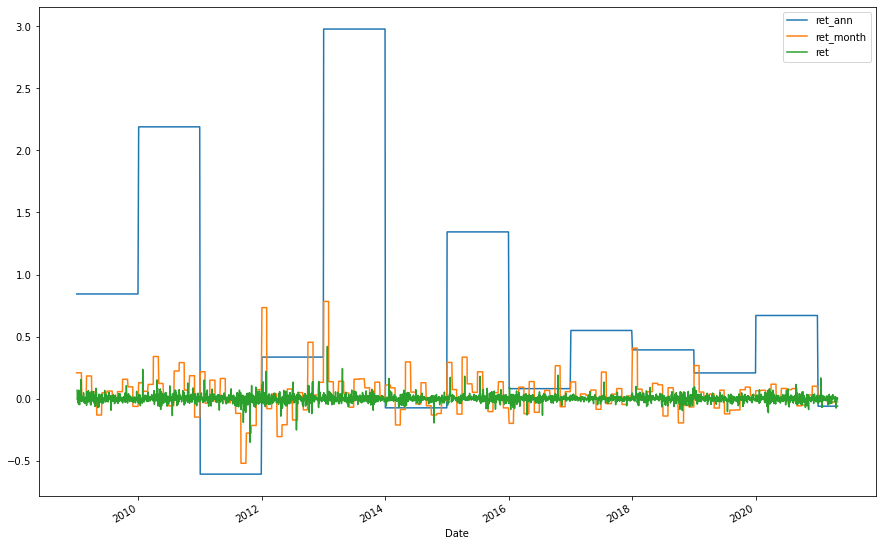

In [41]:
# don't run this cell